In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data

%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
from matplotlib.colors import to_rgba
from tqdm.notebook import tqdm  # Progress bar

set_matplotlib_formats("svg", "pdf")

# The Basics of PyTorch

In [2]:
print("Using torch", torch.__version__)

Using torch 1.11.0


- 통계적 함수에서 재현 가능하도록 random seed를 고정할 수 있음

In [3]:
torch.manual_seed(42)

## Tensor
### Initialization

In [4]:
x = torch.Tensor(2, 3, 4)  # 메모리에 있는 값으로 초기화 됨
print(x)

tensor([[[-1.8218e+30,  4.5824e-41, -2.6362e+26,  4.5822e-41],
         [-1.8337e+30,  4.5824e-41, -4.6653e+29,  4.5824e-41],
         [-1.8430e+30,  4.5824e-41, -1.7524e+28,  4.5824e-41]],

        [[-7.6770e+27,  4.5824e-41, -5.8495e-05,  4.5824e-41],
         [-5.8495e-05,  4.5824e-41, -5.8245e-05,  4.5824e-41],
         [ 0.0000e+00,  0.0000e+00,  1.3593e-43,  0.0000e+00]]])




- `torch.zeros`: 0으로 채움
- `torch.ones`: 1로 채움
- `torch.rand`: 0과 1 사이의 유니폼 분포 샘플로 채움
- `torch.randn`: 평균 0, 표준편차 1의 정규분포 샘플로 채움
- `torch.arange`: N, N+1, N+2, ..., M 값으로 채움
- `torch.Tensor` (input list):  list의 요소 값으로 채움

In [5]:
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [6]:
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


### Shape

In [7]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


### Tensor to Numpy, and Numpy to Tensor

In [8]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [9]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


In [10]:
tensor = torch.arange(4)
np_arr = tensor.cpu().numpy()

print("PyTorch tensor:", tensor)  # CPU
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


### Operations
- numpy에 있는 연산자는 대부분 pytorch에도 포함. 모든 리스트는 [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#) 에서 확인할 수 있음

In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


- In-place operations 

In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)  # In-place operations 
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


- dimension 조절하기

In [13]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [14]:
x = x.view(2, 3)  # Changing dimension
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [15]:
x = x.permute(1, 0)  # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


행렬을 곱하는 다양한 방법
- `torch.matmul`: 두 텐서의 행렬 곱을 수행하며 차원에 따라 동작이 달라짐, 2차원 텐서 간의 곱인 경우 표준 행렬 곱과 같음. 더 높은 차원의 곱을 위해서 [브로드캐스팅](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)을 지원하며, numpy와 같이 a@b로 표현할 수도 있음 
- `torch.mm`: 행렬 곱을 수행하지만 브로드캐스팅을 지원하지는 않음
- `torch.bmm`: 3차원 텐서를 입력값으로 받으며 3차원 내 2차원 tensor 간의 곱을 batch 식으로 연산함. $(b \times n \times m)$ tensor @ $(b \times m \times p)$ tensor = $(b \times n \times p)$ tensor [(document)](https://pytorch.org/docs/stable/generated/torch.bmm.html?highlight=torch%20bmm#torch.bmm)
- `torch.einsum`: Einstein summation convention

In [16]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [17]:
W = torch.arange(9).view(3, 3)
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [18]:
h = torch.matmul(x, W)
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


## Dynamic Computation Graph and Backpropagation

- 생성된 텐서의 기본값은 gradients를 지원하지 않으나, `requires_grad_()` 함수를 사용하여 속성을 바꾸거나, 텐서를 생성할 때 `requires_grad=True` 옵션을 설정하여 gradients 지원하게 할 수 있음

In [19]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [20]:
x.requires_grad_(True)
print(x.requires_grad)

True


$$ y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right] $$
- 위 함수에서 y 값의 최대 혹은 최소 값을 구해야한다면 x를 파라미터로 생각할 수 있음
- 이 경우 $\partial y / \partial \mathbf{x}$ 값을 얻어야 하며 아래는 입력 값으로 $ \mathbf{x}=[0,1,2] $ 를 가정한 것임

In [21]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [22]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


- 출력값에서 `backward()` 함수를 호출함으로써 backpropagation을 수행할 수 있음
- 속성값이 `requires_grad=True` 인 텐서는 gradients를 계산할 수 있음
- `x.grad`는 $ \partial y / \partial \mathbf{x} $ 값을 가지며, 이는 입력값 $\mathbf{x}=[0,1,2]$에서  $\mathbf{x}$ 값의 변화가 y에 얼마나 영향을 줄 수 있는지를 의미함

In [23]:
y.backward()

In [24]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


## GPU suppprt

- GPU을 가지고 있어도 False가 반환된다면 CUDA version을 확인할 것. Colab의 경우 runtime setup 환경에서 선택할 수 있음

In [25]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


- 기본적으로 모든 tensor는 cpu에 저장되지만, `.to()`, `.cuda()` 함수를 통해 GPU로 이동 가능

In [26]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [27]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


- 위 출력 결과는 `device='cuda:0'`에서 0번째 GPU를 사용하는 것을 의미함
- pytorch는 또한 다수의 GPU 시스템을 지원하므로 관심 있다면, [PyTorch 문서](https://pytorch.org/docs/stable/distributed.html#distributed-basics)를 참조 바람

In [28]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 0.30127s
GPU time: 0.23456s


- CPU와 GPU는 다른 random seed를 사용하므로 양 모델 간 결과 재현을 위해 따로 설정이 필요함

In [29]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Learning by example: Continuous XOR

- XOR 예제는 간단하고 매우 잘 알려져있지만 연속공간에 표현하기 위해 이진 결과에 gaussian noise를 적용하여 아래 그림처럼 표현하였음

![Continuous XOR](https://uvadlc-notebooks.readthedocs.io/en/latest/_images/continuous_xor.svg) 

## The model
- `torch.nn`, `torch.nn.functional` 패키지에는 선형레이어, 활성함수, 유실함수와 같은 유용한 클래스가 정의되어 있음
- (사실 `torch.nn`에는 `torch.nn.functional`을 활용한 함수가 포함되어 있음)
- 네트워크 레이어가 추가로 필요하다면 문서를 먼저 확인한 후 코드에 포함하는 것을 권장함

In [30]:
import torch.nn as nn
import torch.nn.functional as F

## nn.Module
- 모듈의 기본 템플릿은 아래와 같으며 다른 모듈 혹은 스스로를 포함할 수 있음
- forward function 은 모듈을 계산하는 곳이며 `(nn = MyModule(); nn(x))` 방식으로 호출됨
- init function은 모듈의 파라미터를 초기화하는 곳이며 `nn.Parameter`을 사용함
- backward calculation은 자동으로 이루어지지만 원한다면 재정의가 가능

In [31]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

## Simple classifier
![Simple classifier](https://uvadlc-notebooks.readthedocs.io/en/latest/_images/small_neural_network.svg)
- $x_1$, $x_2$는 데이터 포인트, 파란색 원은 입력 뉴런
- 하얀색 원은 tanh 활성함수, 붉은 원은 출력 뉴런을 의미하며 pytorch에서 아래와 같이 정의할 수 있음
- 주의할 것은 아직 출력 뉴런에서 sigmoid를 미적용한 상태이며, 이는 특히 손실의 계산에서 다른 함수가 좀 더 효율적이며 정확하게 계산할 수 있기 때문임(추후에 설명)

In [32]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [33]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


- `parameters()`, `named_parameters()` 함수를 통해 서브모듈의 파라미터 확인이 가능함
- 각 선형 레이어는 [output, input] 형태의 행렬과 [output] 형태의 bias로 구성됨

In [34]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


## The data
### The dataset class
- 데이터셋을 정의하기 위해 `__getitem__`과 `__len__` 함수의 정의가 필요함
- get-item 함수는 *i번째* 데이터포인트를 반환하며, len 함수는 dataset의 크기를 반환

In [35]:
import torch.utils.data as data

class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [36]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.9632, 0.1117]), tensor(1))


In [37]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

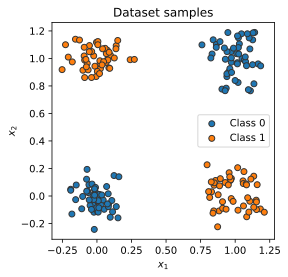

In [38]:
visualize_samples(dataset.data, dataset.label)
plt.show()

### The data loader class
- `torch.utils.data.DataLoader` 클래스는 배치 처리, 멀티프로세싱 데이터 로딩 등 데이터셋의 반복적인 처리를 담당
- 데이터셋의 `__getitem__`과 통신하고 첫 차원을 출력 데이터를 쌓아야 할 데이터 차원으로 인식함
- 데이터셋 클래스와 반대로 고유의 클래스를 정의할 필요는 없으며, argument 입력만으로 원하는 로더를 생성할 수 있음 ([full list](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader))
    - batch_size: 배치 당 쌓는 샘플 수
    - shuffle: 참인 경우 무작위 순서로 반환되며 통계적 요소를 적용하는 중요한 인자임
    - num_workers: 데이터로딩에 사용하는 프로세스 수. 기본값은 0으로 메인 프로세스만을 사용하는 의미이므로 이미지가 큰 경우 속도가 저하될 수 있어 값을 늘리기를 권장하나 윈도우 OS에서는 일부 이슈가 발생할 수 있음. 일반적인 작은 데이터에서는 0도 충분히 빠름
    - pin_memory: 참인 경우 반환 전에 CUDA 메모리로 데이터를 복사하며 이는 GPU를 사용하는 학급 과정에서 시간을 절약할 수 있으나 검증이나 테스트 과정에는 일반적으로 효과가 적음
    - drop_last: 참인 경우 설정한 배치 사이즈보다 마지막 남은 데이터가 작은 경우 데이터를 지움. 데이터셋의 크기가 배치의 배수가 아닌 경우 발생하며 배치사이즈를 유지하는 학습 과정에서 잠재적으로 도움이 될 수 있음

In [39]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [40]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0890,  0.8608],
        [ 1.0905, -0.0128],
        [ 0.7967,  0.2268],
        [-0.0688,  0.0371],
        [ 0.8732, -0.2240],
        [-0.0559, -0.0282],
        [ 0.9277,  0.0978],
        [ 1.0150,  0.9689]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 1, 0, 1, 0])


## Optimization
- 모델을 학습하는 과정은 다음과 같으며 1,2,4번은 이미 설명을 했기 때문에 3,5번에 대해 언급하겠음
    1. 데이터로더 준비
    2. 배치마다 모델을 통해 예측값을 얻음
    3. 예측값과 레이블의 손실값을 계산함 
    4. Backpropagation: 모든 파라미터에 대해 손실과 관련된 그래디언트를 계산
    5. 파라미터를 그래디언트 방향으로 업데이트 함 

### Loss modules
- 이항 분류 시 **Binary Cross Entorpy**를 사용할 수 있으며 정의는 아래와 같음
$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

- pytorch는 이미 사전 정의된 다양한 손실함수를 제공함[full list](https://pytorch.org/docs/stable/nn.html#loss-functions)
    - 예를 들어 `nn.BCELoss()`는 입력값 $x$가 $[0, 1]$의 범위일 것이라고 가정하지만, `nn.BCEWithLogitsLoss()`는 단일 클래스에서 sigmoid layer와 BCE Loss가 포함되어 있음
    - 손실 함수에 적용된 로그 때문에 BCE Loss에 Sigmoid를 사용하는 것 보다 안정적일 수 있으므로 logit에 적용된 손실 함수를 사용하는 것이 좋음
    - 이 경우 모델의 출력에 sigmoid를 적용하지 않음

In [41]:
loss_module = nn.BCEWithLogitsLoss()

### Stochastic Gradient Descent
- 파라미터 최적화를 위해 `torch.optim` 패키지를 제공함
- 예제는 간단한 학습이므로 `torch.optim.SGD`를 사용함
- Stochastic Gradient Descent는 학습률이라는 고정된 작은 상수로 그래디언트를 곱하는 방법으로 파라미터를 업데이트하는 방식임

In [42]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

- optimizer는 2개의 유용항 함수를 제공함
    - `optimizer.step()`: 파라미터를 갱신함
    - `optimizer.zero_grad()`: 모든 그래디언트를 0으로 설정
- optimizer는 새로운 그래디언트를 덮어쓰는 대신 합산하므로 그래디언트 계산 전에 `optimizer.zero_grad()`를 꼭 호출해야 함

### Training
- dataset과 data loader를 생성하면서 배치 크기를 선택함
- 모델 학습의 5단계
    - Load a batch
    - Obtain the predictions
    - Calculate the loss
    - Backpropagate
    - Update

In [43]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

- GPU 연산으로 절약되는 시간보다 데이터를 GPU에 보내는 시간이 더 걸릴 수 있지만 연습을 위해 GPU를 사용함

In [44]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

- 모델을 학습모드로 변경하기 위해 `model.train()`을 실행
    - 학습과 테스트의 forward 동작이 다른 일부 함수(e.g. BatchNorm and Dropout)들이 존재함
- `model.train()`, `model.eval()`로 모드 간 전환이 가능함

In [45]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            # Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]

            # Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            # Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            # Step 5: Update the parameters
            optimizer.step()

In [46]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

### Saving a model
- 학습된 모델로 부터 모든 학습 가능한 파라미터인 `state_dict`을 추출할 수 있음
- state dictionary는 'torch.save'로 저장하 할 수 있음
- load_state_dict을 사용하여 디스크로 부터 저장된 state dictionary를 덮어쓸 수 있음 

In [47]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-2.0209, -2.3101],
        [ 1.3066, -1.8463],
        [-1.5089, -0.6550],
        [-0.7824, -0.9385]], device='cuda:0')), ('linear1.bias', tensor([ 0.7382, -0.9136,  1.4607, -0.1769], device='cuda:0')), ('linear2.weight', tensor([[-2.5543,  1.9722,  2.1591, -0.4553]], device='cuda:0')), ('linear2.bias', tensor([-1.0225], device='cuda:0'))])


In [48]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

In [49]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-2.0209, -2.3101],
        [ 1.3066, -1.8463],
        [-1.5089, -0.6550],
        [-0.7824, -0.9385]], device='cuda:0')), ('linear1.bias', tensor([ 0.7382, -0.9136,  1.4607, -0.1769], device='cuda:0')), ('linear2.weight', tensor([[-2.5543,  1.9722,  2.1591, -0.4553]], device='cuda:0')), ('linear2.bias', tensor([-1.0225], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-2.0209, -2.3101],
        [ 1.3066, -1.8463],
        [-1.5089, -0.6550],
        [-0.7824, -0.9385]])), ('linear1.bias', tensor([ 0.7382, -0.9136,  1.4607, -0.1769])), ('linear2.weight', tensor([[-2.5543,  1.9722,  2.1591, -0.4553]])), ('linear2.bias', tensor([-1.0225]))])


### Evaluation
- 무작위로 생성된 데이터 hold-out test set을 사용하여 모델 검증을 실시함

In [50]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

- 평가 기준으로 accuracy를 사용하며 공식은 아래와 같음
$$ acc = \frac{\sharp \, correct \, predictions}{\sharp \, all \, predictions} = \frac{TP+TN}{TP+TN+FP+FN} $$
- 평가 시에는 그래디언트 계산이 불필요하므로 `with torch.no_grad()` 하단에 코드를 추가하여 그래디언트 계산을 비활성화 할 수 있음

In [51]:
def eval_model(model, data_loader):
    model.eval()  # Set model to eval mode
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():  # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)  # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long()  # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [52]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


- 100%에 가까운 결과가 나왔지만 일반적으로 대부분의 문제는 더욱 복잡하기 때문에 이러한 결과를 얻기 힘듬

## Visualizing classification boundaries
- 모델의 학습결과를 시각화하기 위해 [-0.5, 1.5] 범위의 모든 데이터 위치에서 예측 결과를 표현함
- 백그라운드 이미지에서 class 0(bule), class 1(orange)를 의미함

/opt/conda/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


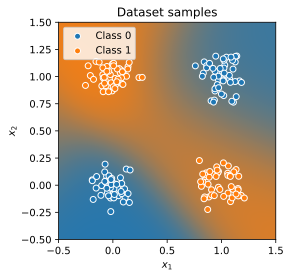

In [53]:
@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="white", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="white", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

output_image = visualize_classification(model, dataset.data, dataset.label)
plt.show()